<a href="https://colab.research.google.com/github/ANIRUDHCA/DS_Assignments/blob/main/Neural_Network_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import sequential
from keras.layers import Dense,Dropout
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/forestfires.csv')


In [4]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
data.shape

(517, 31)

In [6]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.drop(data.iloc[:,10:30],axis=1,inplace=True)

In [9]:
Le = LabelEncoder()
data['month'] = Le.fit_transform(data['month'])
data['day'] = Le.fit_transform(data['day'])

In [10]:
data.shape

(517, 11)

In [11]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


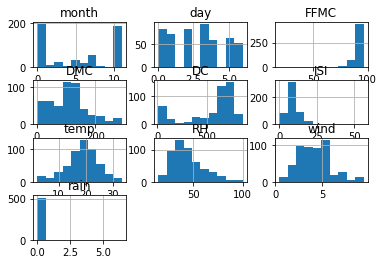

In [27]:
data.hist()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

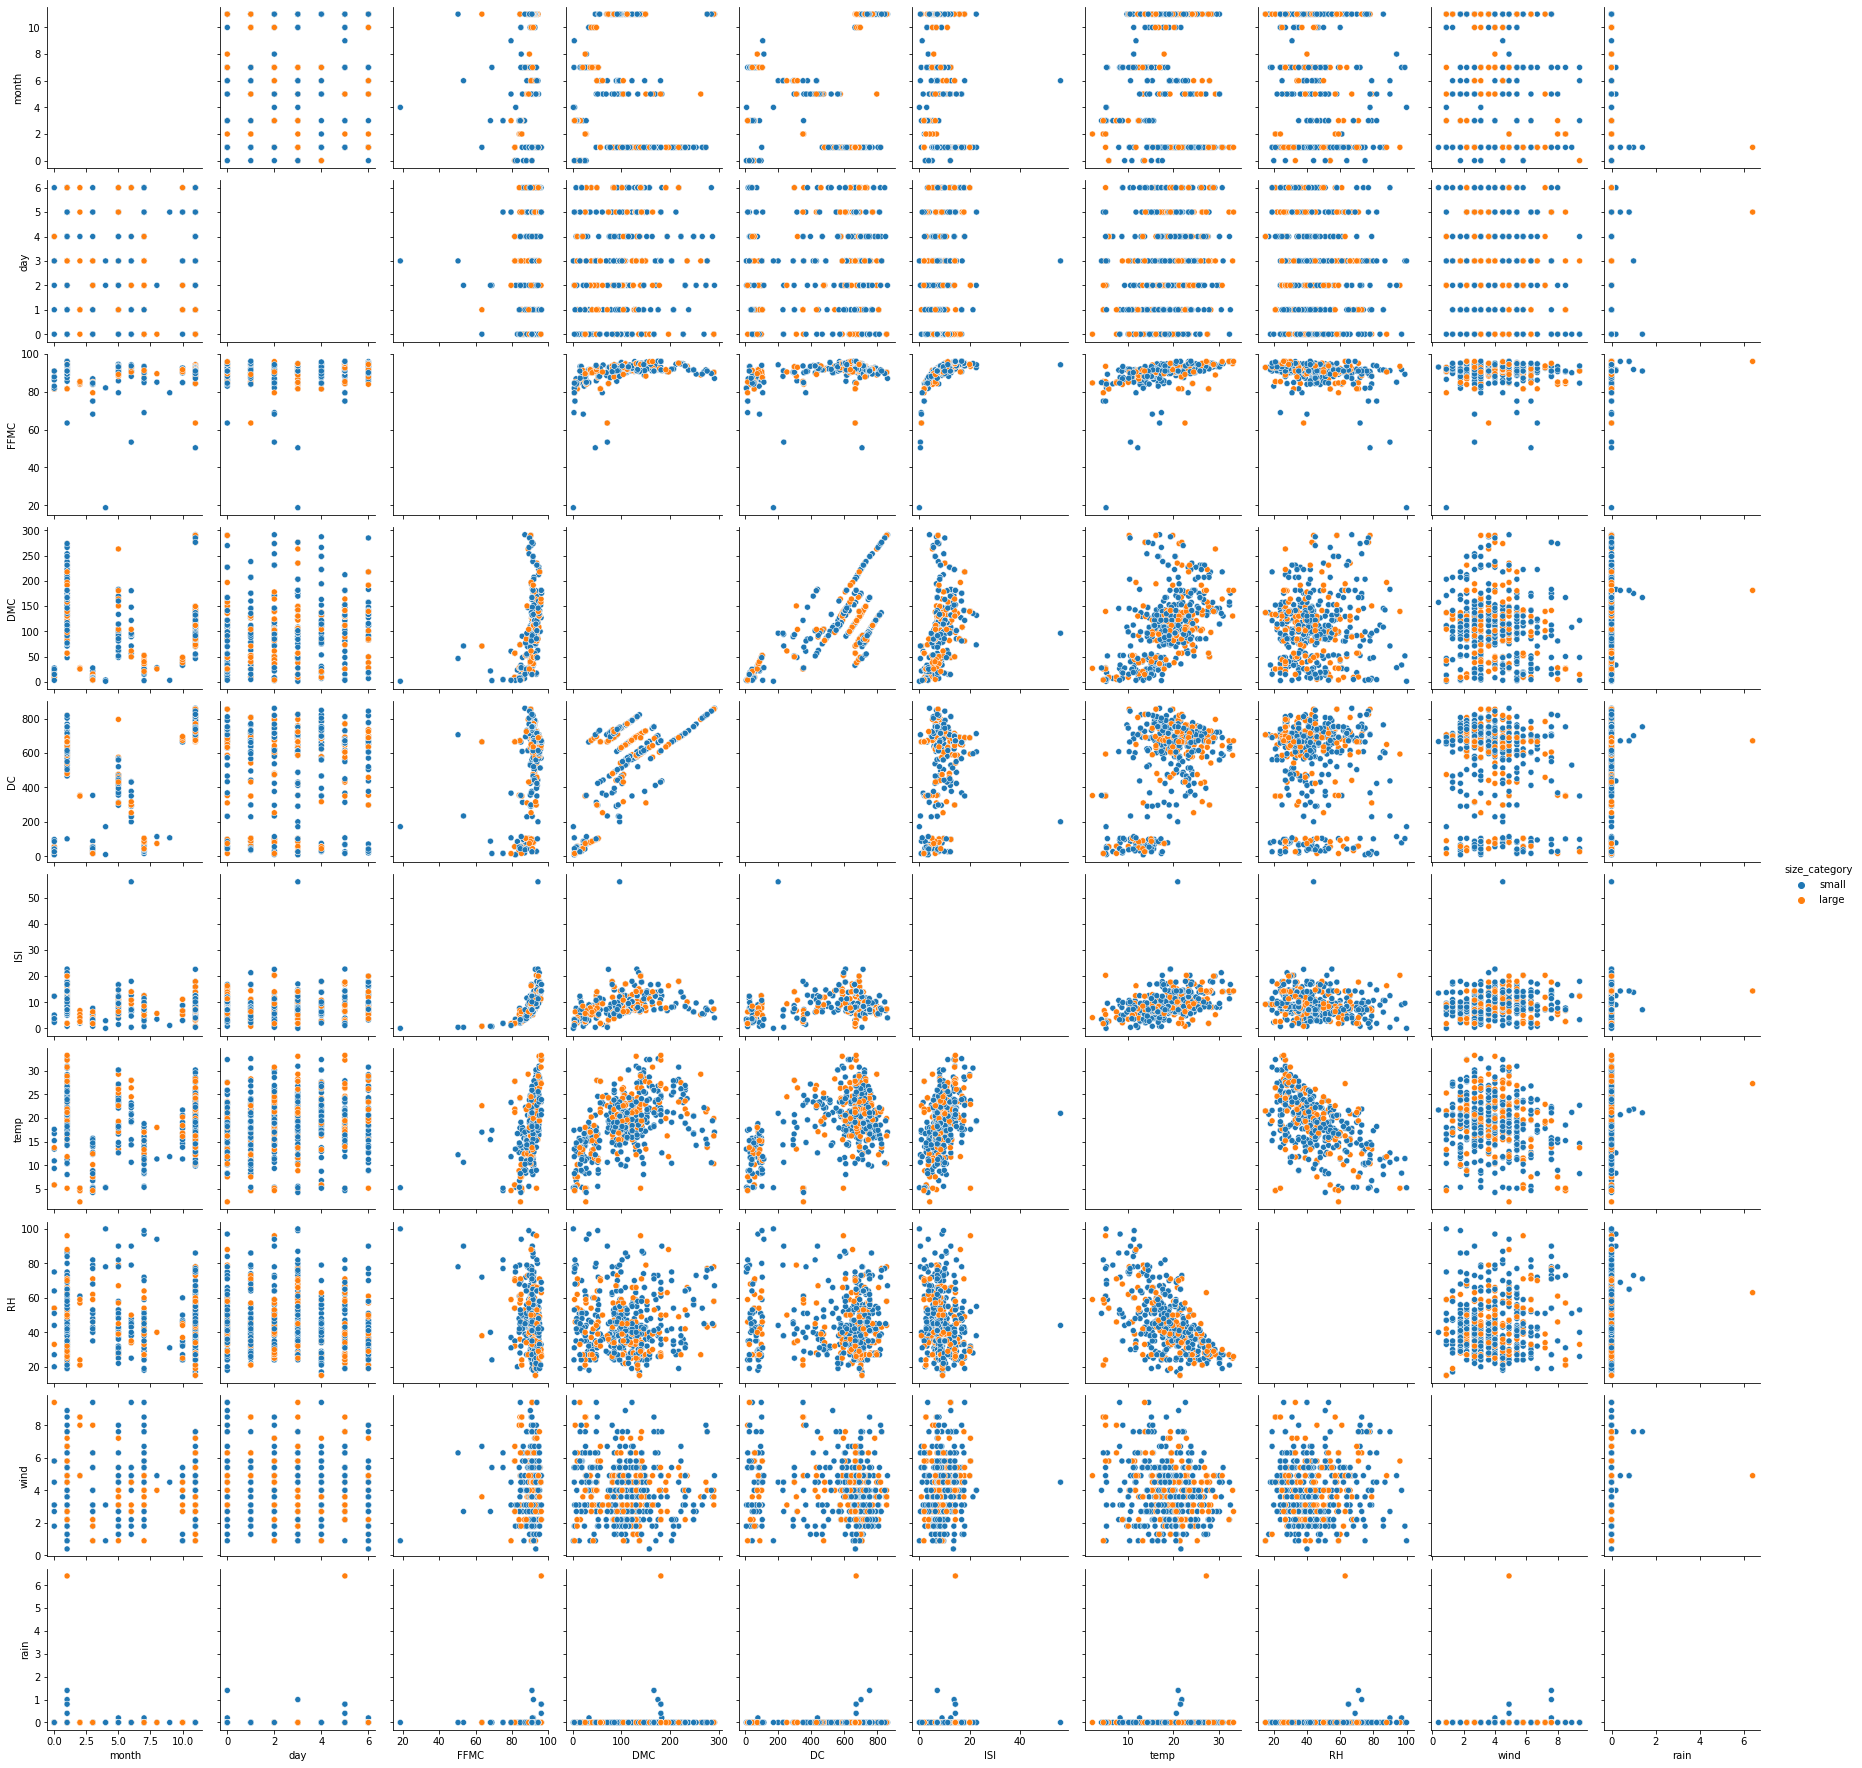

In [13]:
sns.pairplot(data,hue = 'size_category',diag_kind='Kde')
plt.show

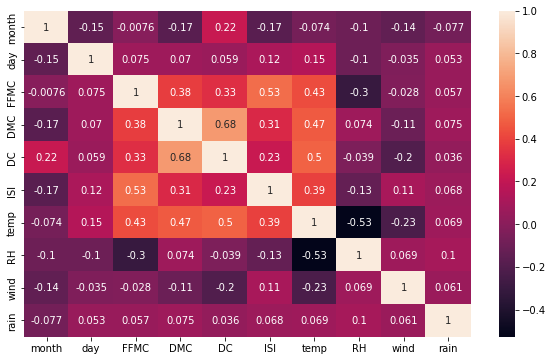

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
 x = data.drop('size_category',axis=1)
 y = data[['size_category']]

In [ ]:
std = StandardScaler()
x_scaled = std.fit_transform(x)

In [ ]:
x_scaled.shape,y.shape

((517, 10), (517, 1))

### Hyperparameter tuning

#### Batch size and epoch

In [ ]:
from keras.engine.sequential import Sequential
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(create_model,verbose = 0)
batch_size = [10,40,50]
epochs = [10,50,100,150]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid= param_grid,cv=KFold())
grid_result = grid.fit(x_scaled,y)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7305825233459473, using {'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 10}
0.6418782591819763,0.10113131896283728 with: {'batch_size': 10, 'epochs': 50}
0.6013256132602691,0.09613647213096142 with: {'batch_size': 10, 'epochs': 100}
0.5858663201332093,0.07698252786331246 with: {'batch_size': 10, 'epochs': 150}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.6707430958747864,0.12153689649922293 with: {'batch_size': 40, 'epochs': 50}
0.6128267288208008,0.1088019241525747 with: {'batch_size': 40, 'epochs': 100}
0.6437640011310577,0.1268853895015694 with: {'batch_size': 40, 'epochs': 150}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 50, 'epochs': 10}
0.62643763422966,0.08486778229243185 with: {'batch_size': 50, 'epochs': 50}
0.6034167230129241,0.09117920457357616 with: {'batch_size': 50, 'epochs': 100}
0.6265309870243072,0.08130872377782526 with: {'batch_size': 50, 'epochs': 1

### Learning Rate and Drop out Rate

In [ ]:
# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(8,input_dim = 12,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs =10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1,1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_scaled,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START dropout_rate=0.0, learning_rate=0.001......................
[CV 1/5; 1/12] END dropout_rate=0.0, learning_rate=0.001;, score=1.000 total time=   1.4s
[CV 2/5; 1/12] START dropout_rate=0.0, learning_rate=0.001......................
[CV 2/5; 1/12] END dropout_rate=0.0, learning_rate=0.001;, score=0.750 total time=   1.4s
[CV 3/5; 1/12] START dropout_rate=0.0, learning_rate=0.001......................
[CV 3/5; 1/12] END dropout_rate=0.0, learning_rate=0.001;, score=0.524 total time=   1.2s
[CV 4/5; 1/12] START dropout_rate=0.0, learning_rate=0.001......................
[CV 4/5; 1/12] END dropout_rate=0.0, learning_rate=0.001;, score=0.680 total time=   1.6s
[CV 5/5; 1/12] START dropout_rate=0.0, learning_rate=0.001......................
[CV 5/5; 1/12] END dropout_rate=0.0, learning_rate=0.001;, score=0.699 total time=   1.6s
[CV 1/5; 2/12] START dropout_rate=0.0, learning_rate=0.01.......................
[CV

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7305825233459473, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.0, 'learning_rate': 1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7094286799430847,0.11922928303363226 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7132748365402222,0.12528507201800687 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7305825233459473,0.15435

### Activation Function and Kernel Initializer

In [ ]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(12,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(8,input_dim = 12,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters
activation_function = ['relu','tanh']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_scaled,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=relu, init=uniform......................
[CV 1/5; 1/6] END activation_function=relu, init=uniform;, score=1.000 total time=   1.4s
[CV 2/5; 1/6] START activation_function=relu, init=uniform......................
[CV 2/5; 1/6] END activation_function=relu, init=uniform;, score=0.750 total time=   1.8s
[CV 3/5; 1/6] START activation_function=relu, init=uniform......................
[CV 3/5; 1/6] END activation_function=relu, init=uniform;, score=0.524 total time=   1.3s
[CV 4/5; 1/6] START activation_function=relu, init=uniform......................
[CV 4/5; 1/6] END activation_function=relu, init=uniform;, score=0.680 total time=   1.4s
[CV 5/5; 1/6] START activation_function=relu, init=uniform......................
[CV 5/5; 1/6] END activation_function=relu, init=uniform;, score=0.699 total time=   1.3s
[CV 1/5; 2/6] START activation_function=relu, init=normal.......................
[CV 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7305825233459473, using {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7286407709121704,0.1547957721980402 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7286407709121704,0.1547957721980402 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}


### Number of Neurons in Activation Layer

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'zero',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'zero',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_scaled,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=1.000 total time=   1.5s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.750 total time=   1.3s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.524 total time=   1.3s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.680 total time=   2.0s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.699 total time=   1.4s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7305825233459473, using {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 8, 'neuron2': 8}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 2}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 16, 'neuron2': 8}


### Final model with tuned Hyperparameters

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(4,input_dim = 10,kernel_initializer = 'zero',activation = 'relu'))
    model.add(Dense(2,input_dim = 4,kernel_initializer = 'zero',activation = 'relu'))    
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.1) 
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model_final = KerasClassifier(build_fn = create_model,batch_size=10,epochs=10,verbose=0)

result = model_final.fit(x_scaled,y)


In [ ]:
y_pred = model_final.predict(x_scaled)
accuracy_score(y,y_pred)

0.7311411992263056